In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
color_palette = ['#023047', '#e85d04', '#0077b6', '#0096c7', '#ff9c33']


In [3]:
sns.set_palette(sns.color_palette(color_palette))

In [4]:
arquivos = glob.glob("*.csv")

# Inicializa um DataFrame vazio
df_concatenado = pd.DataFrame()

# Itera sobre cada arquivo e faz a junção
for arquivo in arquivos:
    df_temp = pd.read_csv(arquivo)
    if df_concatenado.empty:
        df_concatenado = df_temp
    else:
        df_concatenado = pd.merge(df_concatenado, df_temp, on='SEQN', how='outer')

In [5]:
df_concatenado.drop('ANGINA_GRADE', axis=1, inplace=True)

KeyError: "['ANGINA_GRADE'] not found in axis"

In [6]:
df_concatenado.shape

(7239, 46)

In [7]:
df_concatenado.isna().sum()

Unnamed: 0                  0
SEQN                        0
ALCOHOL_FREQUENCY           0
ALCOHOL_QUANTITY            0
VIGOROUS_ACTIVITY           0
DAYS_VIGOROUS_ACTIVITY      0
MODERATE_ACTIVITY           0
DAYS_MODERATE_ACTIVITY      0
SMOKE                       0
KIDNEY_DISEASE              0
DIALYSES                    0
GENDER                      0
AGE                         0
RACE                        0
EDUCATION                   0
MARITAL_STATUS              0
POVERT_RATIO                0
DIABETES                    0
WEIGHT                      0
HEIGHT                      0
BMI                         0
WAIST                       0
HIGH_PRESSURE               0
HIGH_CHOLESTEROL            0
SYSTOLIC_PRESSURE           0
DIASTOLIC_PRESSURE          0
ASTHMA                      0
BLOOD_TRANSFUSION           0
ARTHRITIS                   0
CONGESTIVE_HEART_FAILURE    0
CORONARY_DISEASE            0
HEART_ATTACK                0
STROKE                      0
THYROID_PR

In [8]:
#Considerando que os missings de cada conjunto de dados foi tratado individualmente, os dados faltantes desse novo 
#conjunto representa informações que não conseguiriamos preencher de uma maneira precisa, impactando negativamente o algoritmo final, portanto
#os dados faltantes serão removidos
df_concatenado.dropna(inplace=True)

In [9]:
df_concatenado.rename(columns={'DIQ010': 'DIABETES'}, inplace=True)

In [10]:
pd.set_option('display.max_columns', None)


In [15]:
df_concatenado.to_excel('dados_demograficos_streamlit.xlsx')

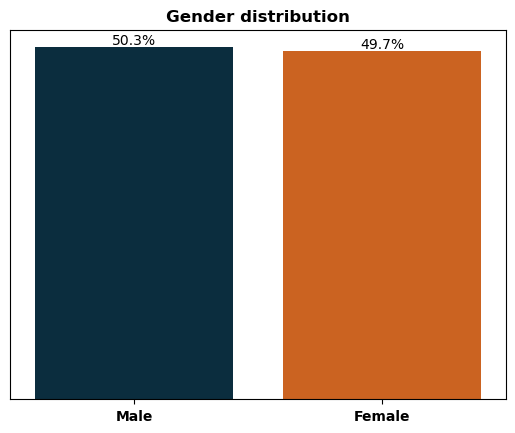

<Figure size 1200x800 with 0 Axes>

In [12]:
ax = sns.countplot(data=df_concatenado, x='GENDER', hue='GENDER', legend=False, palette=color_palette[:2])
ax.set_title('Gender distribution', fontweight='bold')

plt.figure(figsize=(12, 8))  # Ajuste os valores conforme necessário


tick_positions = [0, 1]
ax.set_xticks(tick_positions)
ax.set_xticklabels(['Male', 'Female'], fontweight='bold')
ax.set_xlabel('')
ax.grid(False)
ax.yaxis.set_visible(False)

total = len(df_concatenado)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

for count, percentage in zip(ax.patches, percentages):
    x = count.get_x() + count.get_width() / 2
    y = count.get_height()
    ax.annotate(f"{percentage:.1f}%", (x, y), ha='center', va='bottom')
plt.show()

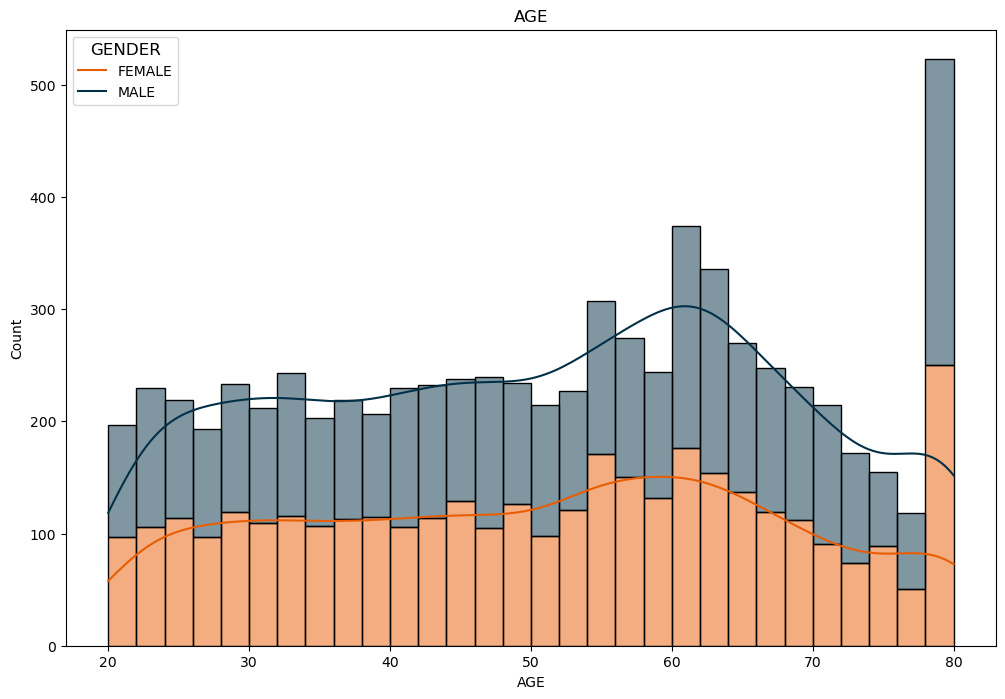

In [13]:

plt.figure(figsize=(12, 8))  # Ajuste os valores conforme necessário

f=sns.histplot(x='AGE', data=df_concatenado, stat='count', ax=None, hue='GENDER', multiple='stack', kde=True, bins=30, palette=color_palette[:2])
legend=f.legend(title='GENDER', labels=['FEMALE', 'MALE'])
plt.setp(legend.get_title(), fontsize='12')
legend.legend_handles[0]._sizes = [1]
legend.legend_handles[1]._sizes = [1]
plt.title('AGE')
plt.xlabel('AGE')
#plt.ylabel('Quantidade Total de Ocorrências')
plt.show()

plt.show()

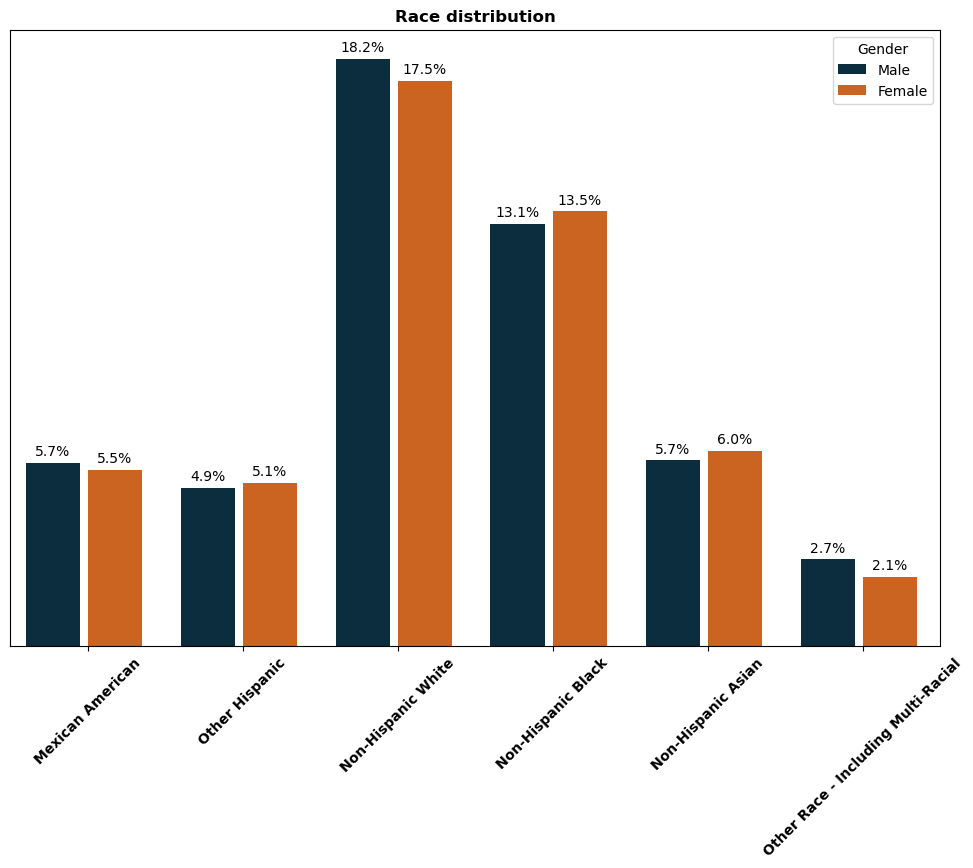

In [50]:
plt.figure(figsize=(12, 8)) 

ax = sns.countplot(data=df_concatenado, x='RACE', hue='GENDER', palette=color_palette[:2], dodge=True)

# Ajuste do título e dos ticks
ax.set_title('Race distribution', fontweight='bold')

# Ajustar os ticks do eixo x
tick_positions = np.arange(len(df_concatenado['RACE'].unique()))
ax.set_xticks(tick_positions)
ax.set_xticklabels(['Mexican American', 'Other Hispanic', 'Non-Hispanic White', 'Non-Hispanic Black', 'Non-Hispanic Asian', 'Other Race - Including Multi-Racial'], ha='center', rotation=45, fontweight='bold')
ax.set_xlabel('')
ax.grid(False)
ax.yaxis.set_visible(False)

# Ajustar a largura das barras e a separação entre barras
bar_width = 0.35  # Ajuste conforme necessário
for i, patch in enumerate(ax.patches):
    patch.set_width(bar_width)

# Calculando totais e porcentagens
total = len(df_concatenado)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

# Ajustar a posição horizontal dos rótulos de porcentagem
for count, percentage in zip(ax.patches, percentages):
    x = count.get_x() + count.get_width() / 2
    y = count.get_height()
    if percentage > 0:  # Evita anotar porcentagens zero
        ax.annotate(f"{percentage:.1f}%", (x, y + 0.5), ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Male', 'Female'], title='Gender', loc='upper right')

plt.show()

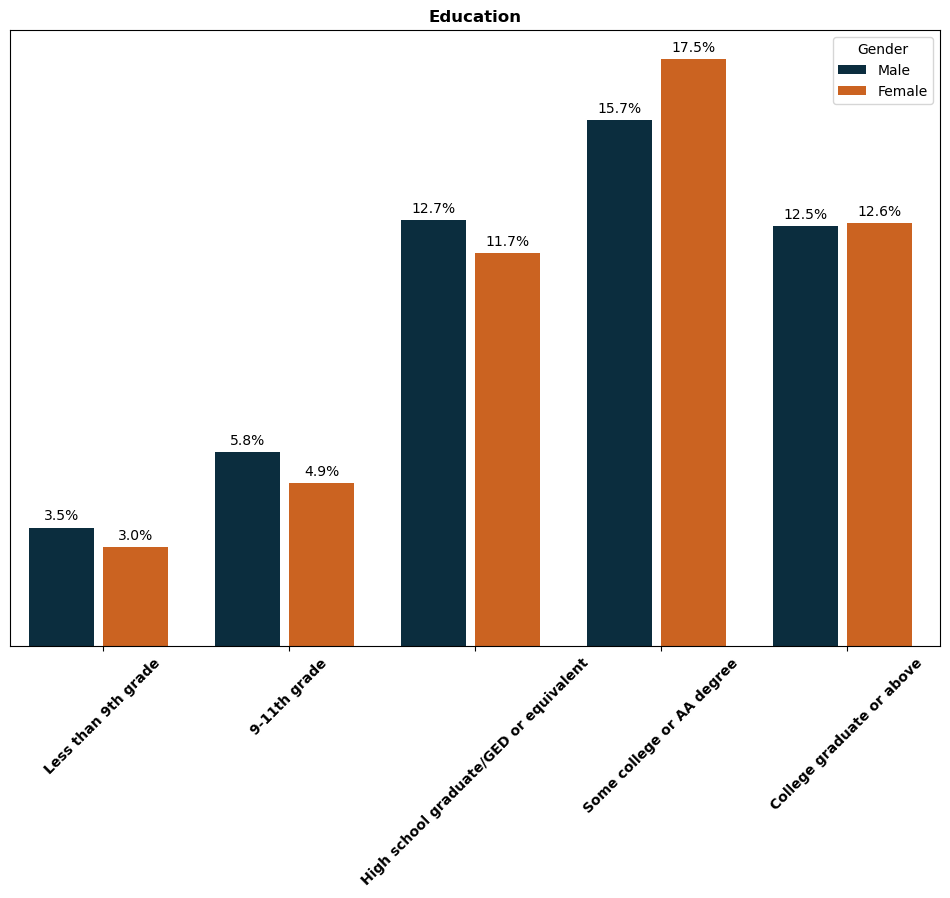

In [51]:
plt.figure(figsize=(12, 8))  # Ajuste os valores conforme necessário

ax = sns.countplot(data=df_concatenado, x='EDUCATION', hue='GENDER', palette=color_palette[:2], dodge=True)

# Ajuste do título e dos ticks
ax.set_title('Education', fontweight='bold')

# Ajustar os ticks do eixo x
tick_positions = np.arange(len(df_concatenado['EDUCATION'].unique()))
ax.set_xticks(tick_positions)
ax.set_xticklabels(['Less than 9th grade', '9-11th grade', 'High school graduate/GED or equivalent', 'Some college or AA degree', 'College graduate or above'], ha='center', rotation = 45, fontweight='bold')
ax.set_xlabel('')
ax.grid(False)
ax.yaxis.set_visible(False)

# Ajustar a largura das barras e a separação entre barras
bar_width = 0.35  # Ajuste conforme necessário
for i, patch in enumerate(ax.patches):
    patch.set_width(bar_width)

# Calculando totais e porcentagens
total = len(df_concatenado)
counts = [count.get_height() for count in ax.patches]
percentages = [(count / total) * 100 for count in counts]

# Ajustar a posição horizontal dos rótulos de porcentagem
for count, percentage in zip(ax.patches, percentages):
    x = count.get_x() + count.get_width() / 2
    y = count.get_height()
    if percentage > 0:  # Evita anotar porcentagens zero
        ax.annotate(f"{percentage:.1f}%", (x, y + 0.5), ha='center', va='bottom', xytext=(0, 3), textcoords='offset points')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Male', 'Female'], title='Gender', loc='upper right')

plt.show()

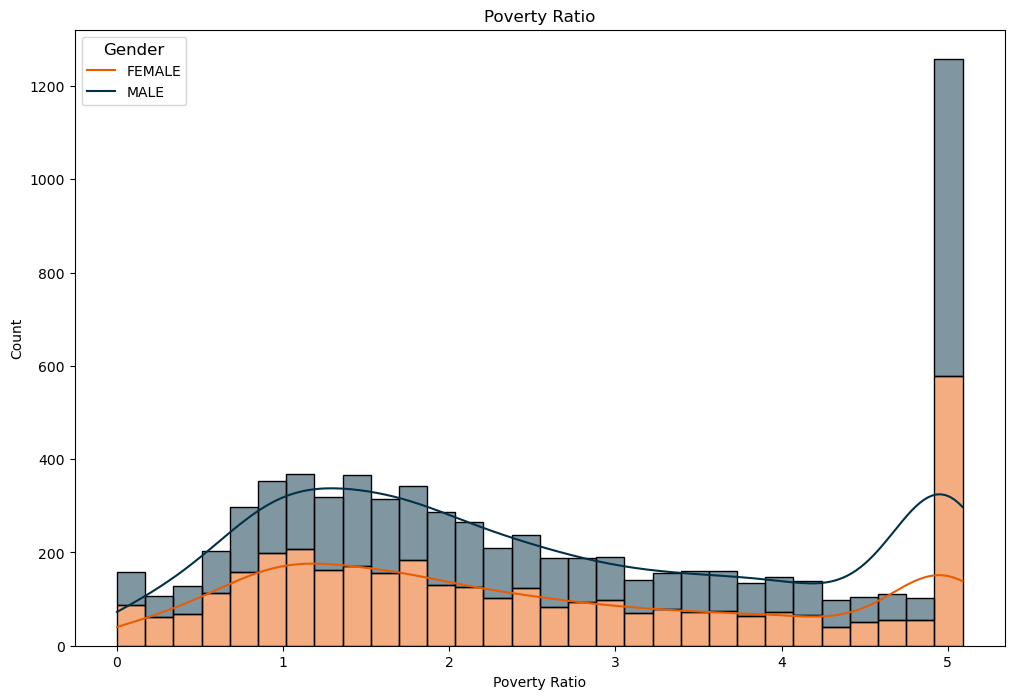

In [14]:
plt.figure(figsize=(12, 8))  # Ajuste os valores conforme necessário

f=sns.histplot(x='POVERT_RATIO', data=df_concatenado, stat='count', ax=None, hue='GENDER', multiple='stack', kde=True, bins=30, palette=color_palette[:2])
legend=f.legend(title='Gender', labels=['FEMALE', 'MALE'])
plt.setp(legend.get_title(), fontsize='12')
legend.legend_handles[0]._sizes = [1]
legend.legend_handles[1]._sizes = [1]
plt.title('Poverty Ratio')
plt.xlabel('Poverty Ratio')
#plt.ylabel('Quantidade Total de Ocorrências')
plt.show()

plt.show()